In [43]:
import random
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [44]:
# Define the target image size
target_image_size = 256

# Create a dataset from the image folder with CenterCrop transformation
transform = transforms.Compose([
    transforms.Resize(target_image_size),  # Resize to a larger size
    transforms.CenterCrop(target_image_size),  # Center crop to the target size
    transforms.ToTensor(),
])

In [100]:
batch_size = 64
dataset = torchvision.datasets.ImageFolder(root='../data/PlantVillage/dataset/train', transform=transform)
# train_dl = DataLoader(trainset, batch_size, shuffle=True, num_workers=3, pin_memory=True)

Tomato Bacterial Spot
Tomato Mosaic Virus
Tomato Spider Mites 
Tomato Healthy
Tomato TYLCV
Tomato Early Blight
Tomato Early Blight
Tomato TYLCV
Tomato Bacterial Spot
Tomato Late Blight
Tomato Mold
Tomato Late Blight
Pepper Healthy
Tomato TYLCV
Tomato TYLCV
Tomato Septoria Spot
Potato Healthy
Pepper Bacterial Spot
Potato Late Blight
Potato Early Blight
Tomato Early Blight
Tomato Bacterial Spot
Tomato Target Spot
Tomato TYLCV
Tomato Mold


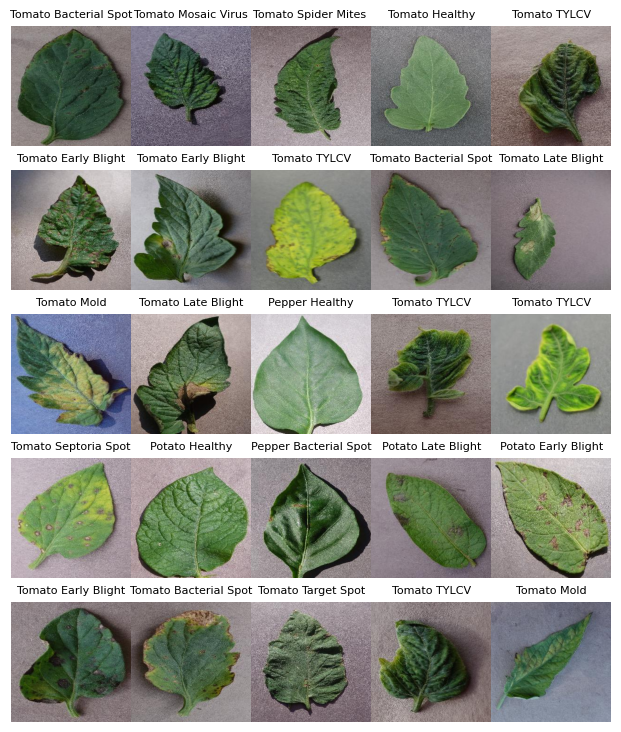

In [115]:
unique_labels = list(set(dataset.targets))

# Create a list to store one random image per class
one_image_per_class = []
for label in unique_labels:
    # Find all images with the current label
    class_indices = [idx for idx, image_label in enumerate(dataset.targets) if image_label == label]
    # Select a random image from the class
    random_image_idx = random.choice(class_indices)
    one_image_per_class.append(dataset[random_image_idx])

# Get additional random images to fill the remaining slots
num_images_to_display = 25
num_additional_images = num_images_to_display - len(one_image_per_class)
if num_additional_images > 0:
    random_indices = random.sample(range(len(dataset)), num_additional_images)
    additional_images = [dataset[i] for i in random_indices]
    one_image_per_class.extend(additional_images)

random.shuffle(one_image_per_class)

# Create a grid to display the images
grid_rows = 5
grid_cols = 5
fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(6, 6))

for i, (image, label) in enumerate(one_image_per_class):
    row = i // grid_cols
    col = i % grid_cols
    ax = axes[row, col]
    
    # Convert the image tensor to a NumPy array
    image_np = image.numpy().transpose((1, 2, 0))
    
    ax.imshow(image_np)
    label = dataset.classes[label].title().replace("___", "_").replace("__", "_").replace("_", " ").replace("Bell ", "").replace("Tomato Yellowleaf Curl Virus", "TYLCV").replace("Two Spotted Spider Mite","").replace("Tomato Tomato", "Tomato").replace("Leaf ","")
    print(label)
    ax.set_title(f"{label}",fontsize=8)
    ax.axis("off")


plt.subplots_adjust(left=0, right=1, top=1.2, bottom=0, wspace=0, hspace=0)
# plt.tight_layout()
plt.show()